In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv("Dataset/Customers.csv")
products = pd.read_csv("Dataset/Products.csv")
transactions = pd.read_csv("Dataset/Transactions.csv")

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products.tail()

,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


In [5]:
transactions.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86


### Data Preprocessing

In [6]:
df = transactions.merge(customers,on="CustomerID",how="left")
df = df.merge(products,on="ProductID",how="left")

In [7]:
df.to_csv("Dataset/merged_data.csv")

In [8]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [9]:
df.shape

(1000, 13)

In [10]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [12]:
df.drop(columns=["Price_y"],axis=1, inplace=True)

In [13]:
# Convert date columns to datetime format
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

df["SignupDate"] = pd.to_datetime(df["SignupDate"])

In [14]:
# Extract date-based features

df["TransactionYear"] = df["TransactionDate"].dt.year

df["TransactionMonth"] = df["TransactionDate"].dt.month

In [15]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,TransactionYear,TransactionMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,2024,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,2024,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,2024,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,2024,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,2024,3


In [16]:
# Calculate Customer Tenure in days
df["CustomerTenure"] = (df["TransactionDate"] - df["SignupDate"]).dt.days
df["CustomerTenure"] = df["CustomerTenure"].apply(lambda x: max(x, 0))  # Fix negatives

# Additional Features
df["CustomerTenureYears"] = df["CustomerTenure"] / 365  # Convert to years
df["IsNewCustomer"] = (df["CustomerTenure"] < 30).astype(int)  # Binary flag for new customers

# Categorize Tenure into Groups
def tenure_category(days):
    if days < 30:
        return "New"
    elif days < 180:
        return "Regular"
    else:
        return "Loyal"

df["TenureCategory"] = df["CustomerTenure"].apply(tenure_category)

In [17]:
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,TransactionYear,TransactionMonth,CustomerTenure,CustomerTenureYears,IsNewCustomer,TenureCategory
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,2024,8,631,1.728767,0,Loyal
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,2024,5,0,0.000000,1,New
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,2024,4,21,0.057534,1,New
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,2024,3,0,0.000000,1,New
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,2024,3,737,2.019178,0,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,2024,10,1006,2.756164,0,Loyal
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,2024,6,58,0.158904,0,Regular
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,2024,4,0,0.000000,1,New
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,2024,9,0,0.000000,1,New


In [18]:
df.drop(columns=['TransactionDate','SignupDate','CustomerName'],axis=1,inplace=True)

In [19]:
df.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price_x,Region,ProductName,Category,TransactionYear,TransactionMonth,CustomerTenure,CustomerTenureYears,IsNewCustomer,TenureCategory
0,T00001,C0199,P067,1,300.68,300.68,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,8,631,1.728767,0,Loyal
1,T00112,C0146,P067,1,300.68,300.68,Asia,ComfortLiving Bluetooth Speaker,Electronics,2024,5,0,0.000000,1,New
2,T00166,C0127,P067,1,300.68,300.68,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,4,21,0.057534,1,New
3,T00272,C0087,P067,2,601.36,300.68,South America,ComfortLiving Bluetooth Speaker,Electronics,2024,3,0,0.000000,1,New
4,T00363,C0070,P067,3,902.04,300.68,Europe,ComfortLiving Bluetooth Speaker,Electronics,2024,3,737,2.019178,0,Loyal


In [20]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate values
duplicate_values = df.duplicated().sum()

# Summary statistics
summary_stats = df.describe()

# Customer purchase frequency
customer_purchase_counts = df["CustomerID"].value_counts()

# Top-selling products
top_products = df["ProductName"].value_counts().head(10)

# Revenue distribution by region
region_sales = df.groupby("Region")["TotalValue"].sum()

# Sales trends over months
monthly_sales = df.groupby("TransactionMonth")["TotalValue"].sum()


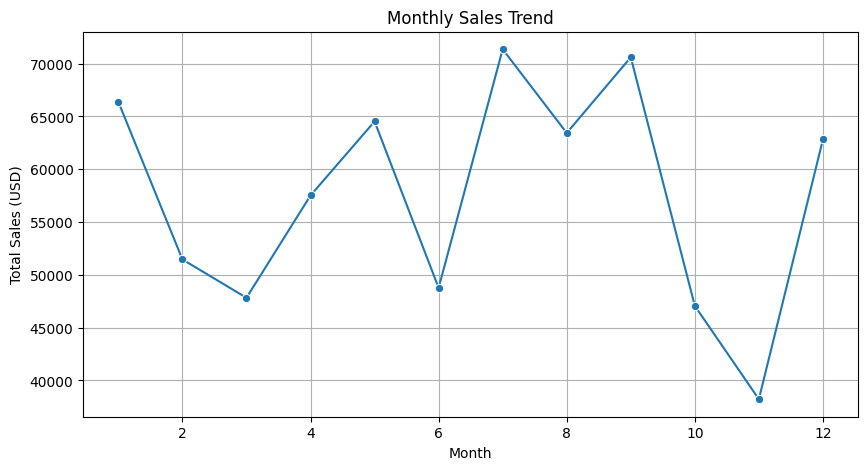

In [21]:
# Plot sales trends
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

### This line chart shows the monthly revenue trends over a year. The x-axis represents months, and the y-axis indicates total sales in dollars. It highlights fluctuations in sales, with peaks and troughs showing varying consumer demand across months.

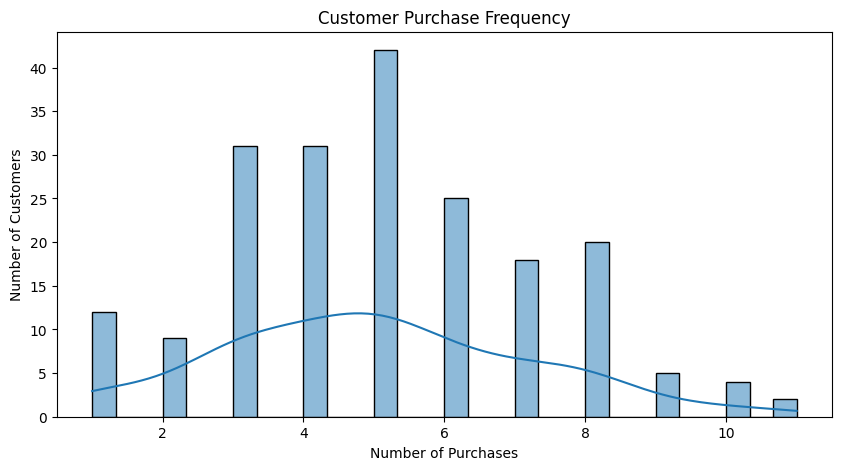

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df["CustomerID"].value_counts(), bins=30, kde=True)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()

### The histogram depicts the distribution of customer purchase frequencies. The x-axis represents the number of purchases, and the y-axis shows the number of customers. Most customers make 2–4 purchases, while fewer make more than six.

C:\Users\Sharma\AppData\Local\Temp\ipykernel_1668\2473916690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="coolwarm")


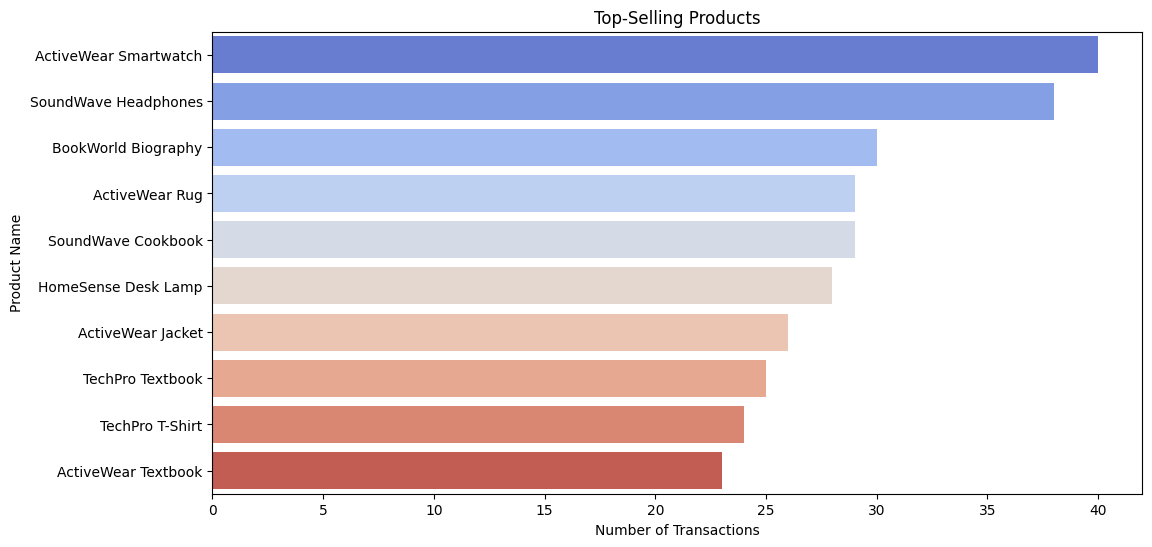

In [23]:
# Bar chart for top-selling products
top_products = df["ProductName"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="coolwarm")
plt.title("Top-Selling Products")
plt.xlabel("Number of Transactions")
plt.ylabel("Product Name")
plt.show()

### This horizontal bar chart lists the top-selling products by transaction count. Products are sorted by popularity, with "ActiveWear Smartwatch" being the most purchased item.

C:\Users\Sharma\AppData\Local\Temp\ipykernel_1668\1535223766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="magma")


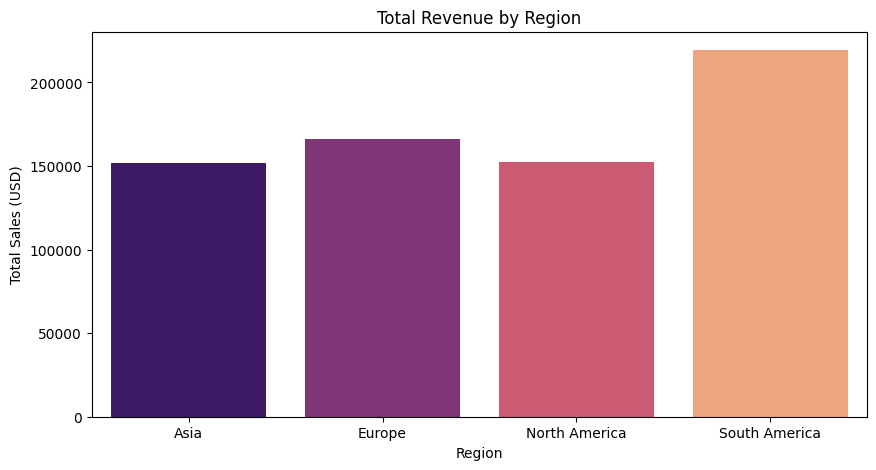

In [24]:
# Bar chart for revenue by region
region_sales = df.groupby("Region")["TotalValue"].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="magma")
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.show()

### This bar chart shows regional revenue distribution. The x-axis lists regions (Asia, Europe, North America, South America), and the y-axis displays revenue in dollars. South America generated the highest revenue, followed by Europe and Asia, with North America contributing the least.

C:\Users\Sharma\AppData\Local\Temp\ipykernel_1668\3933417741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_customers.index, x=top_customers.values, palette="plasma")


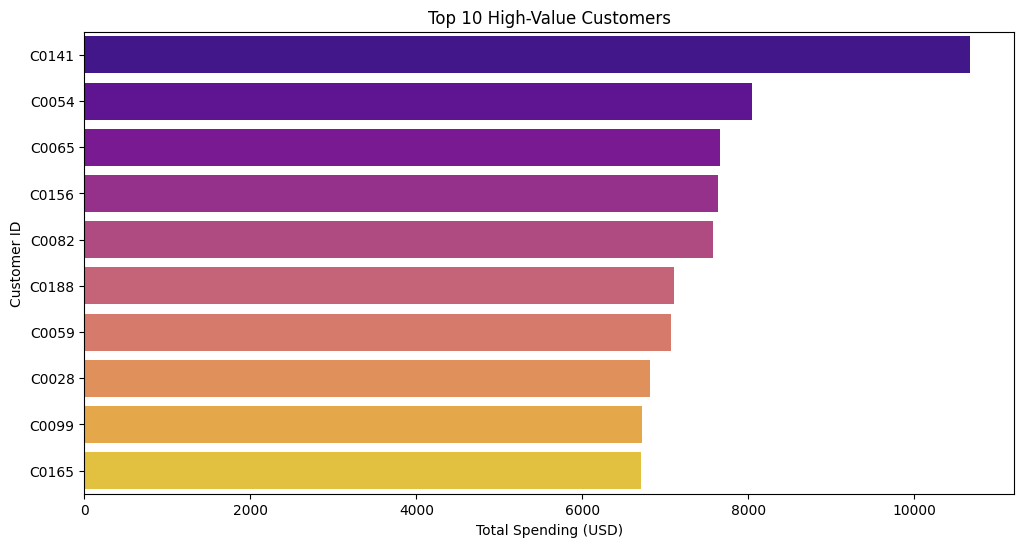

In [25]:
# Identify top customers by total spending
top_customers = df.groupby("CustomerID")["TotalValue"].sum().nlargest(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=top_customers.index, x=top_customers.values, palette="plasma")
plt.title("Top 10 High-Value Customers")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer ID")
plt.show()

### This horizontal bar chart ranks the top 10 customers based on total spending. Customers are labeled on the y-axis, and their total spending (in dollars) is on the x-axis. The chart highlights customers with the most significant contributions to revenue.

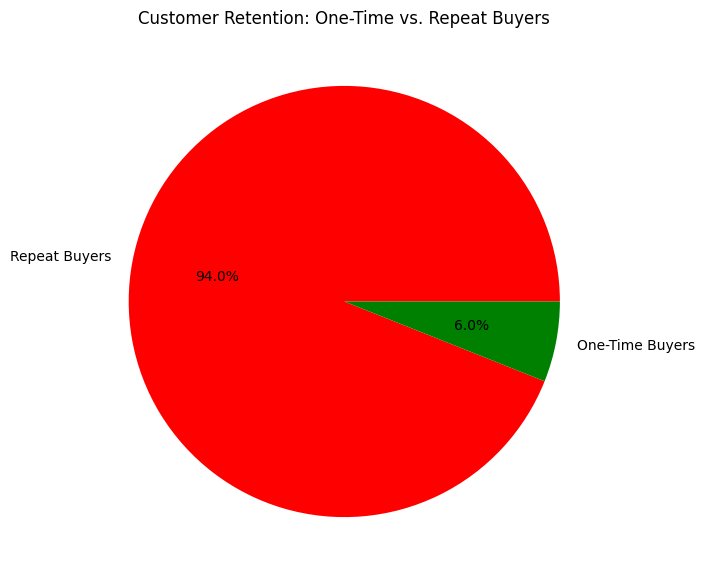

In [26]:
# Count transactions per customer
repeat_customers = df["CustomerID"].value_counts()

# Categorize customers
repeat_labels = ["One-Time Buyers" if x == 1 else "Repeat Buyers" for x in repeat_customers]

# Count occurrences
repeat_summary = pd.Series(repeat_labels).value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(repeat_summary, labels=repeat_summary.index, autopct="%1.1f%%", colors=["red", "green"])
plt.title("Customer Retention: One-Time vs. Repeat Buyers")
plt.show()


### The pie chart compares one-time buyers to repeat buyers. Repeat buyers form the majority (94%), indicating strong customer retention, while one-time buyers account for just 6%.



Average Order Value (AOV): $690.00


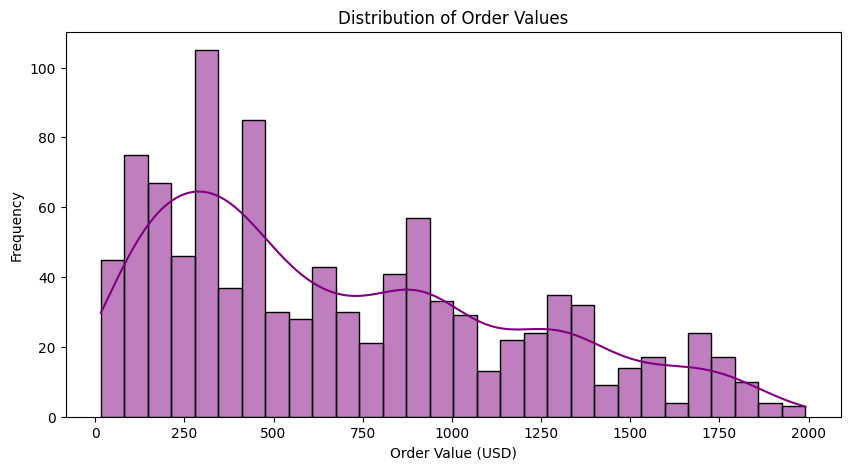

In [27]:
# Calculate Average Order Value (AOV)
aov = df["TotalValue"].mean()
print(f"Average Order Value (AOV): ${aov:.2f}")

# Visualize Order Value Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["TotalValue"], bins=30, kde=True, color="purple")
plt.title("Distribution of Order Values")
plt.xlabel("Order Value (USD)")
plt.ylabel("Frequency")
plt.show()


#### This histogram represents the Distribution of Order Values with a kernel density estimate (KDE) overlay. The x-axis shows order values in USD, ranging from 0 to 2000, while the y-axis indicates the frequency of orders within each range. The chart highlights a peak around the 250–500 range, showing that most orders are of moderate value. Fewer orders exceed dolar 1000, and the frequency steadily decreases as order value increases. The average order value (AOV) is noted as $690. This graph provides insights into customer spending patterns, helping businesses understand typical order sizes and identify high-value orders.